<a href="https://colab.research.google.com/github/vaibhavhirani/ML-Loan-Assignment/blob/main/Feature_engineered_Random_Forest%2C_ANN%2C_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import sys
from google.colab import drive
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, precision_recall_curve, auc

In [2]:
# mount G-Drive folder
drive.mount('/content/drive') 
os.listdir('/content/drive/MyDrive/ML_Loan/')

Mounted at /content/drive


['Ficoed',
 'filtered_LoanStats_securev1_2017Q2.csv',
 'filtered_LoanStats_securev1_2017Q1.csv',
 'filtered_LoanStats_securev1_2017Q3.csv',
 'filtered_LoanStats3d_securev1_2015.csv',
 'filtered_LoanStats3c_securev1_2014.csv',
 'Baseline']

In [3]:

data = pd.read_csv('/content/drive/MyDrive/ML_Loan/Ficoed/filtered_LoanStats.csv')
data.describe()


,loan_amnt,installment,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
count,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.00000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000,457395.000000
mean,0.347708,0.250675,0.307491,0.008510,0.783487,0.018371,0.008647,0.116261,0.121392,0.002791,0.006364,0.059238,0.143815,0.000914,0.000949,0.000030,0.034832,0.003186,0.090792,0.026776,0.001049,0.000135,0.213912,0.033532,0.037730,0.013647,0.121124,0.100154,0.074852,0.119733,0.058437,0.100625,0.104760,0.125669,0.130561,0.002418,0.086035,0.933073,0.012388,0.000669,0.017193,0.018506,0.027305,0.019856,0.179795,0.000164,0.499113,0.000002,0.104573,0.396148,0.296962,0.410759,0.292279,0.008653,0.223710,0.604349,0.000002,0.060307,0.004012,0.018026,0.010437,0.00645,0.048238,0.000586,0.009191,0.006014,0.000024,0.745061,0.254939,0.433754,0.566246,0.996716,0.003284,0.982037,0.017963
std,0.218878,0.149479,0.221944,0.007405,0.411868,0.008895,0.023302,0.163147,0.061438,0.007377,0.008703,0.026794,0.072844,0.007626,0.013482,0.001497,0.038492,0.003573,0.059552,0.032057,0.011708,0.007474,0.110724,0.041946,0.044334,0.034105,0.073334,0.057127,0.046096,0.069744,0.049837,0.054395,0.065740,0.070821,0.060619,0.013218,0.069922,0.098133,0.033192,0.004949,0.017355,0.017571,0.027645,0.020288,0.164272,0.012804,0.500000,0.001479,0.306002,0.489096,0.456920,0.491972,0.454810,0.092620,0.416731,0.488991,0.001479,0.238055,0.063212,0.133045,0.101629,0.08005,0.214270,0.024199,0.095429,0.077320,0.004904,0.435828,0.435828,0.495593,0.495593,0.057210,0.057210,0.132816,0.132816
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [4]:
# Train-test split
y = data['loan_status']
X = data.drop(['loan_status'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.describe()

,loan_amnt,installment,grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,fico_average,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36 months,term_ 60 months,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,debt_settlement_flag_N,debt_settlement_flag_Y
count,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000,365916.000000
mean,0.347849,0.250751,0.307772,0.008508,0.018373,0.008679,0.116299,0.121442,0.002791,0.006368,0.059251,0.143858,0.000911,0.000953,0.000031,0.034826,0.003186,0.090810,0.026768,0.001054,0.000138,0.213943,0.033508,0.037794,0.013689,0.121127,0.100124,0.074871,0.119779,0.058473,0.100618,0.104742,0.125638,0.130608,0.002427,0.086095,0.932990,0.012373,0.000668,0.017193,0.018512,0.027296,0.019863,0.179613,0.000167,0.499511,0.000003,0.104283,0.396036,0.297134,0.410165,0.292701,0.008682,0.223907,0.604046,0.000003,0.060407,0.004042,0.018086,0.010437,0.006501,0.048186,0.000582,0.009125,0.005974,0.000022,0.744460,0.255540,0.434515,0.565485,0.996704,0.003296,0.981974,0.018026
std,0.218853,0.149444,0.222237,0.007444,0.008981,0.023359,0.163122,0.061424,0.007394,0.008782,0.026804,0.072822,0.007546,0.013551,0.001671,0.038429,0.003647,0.059527,0.031989,0.011777,0.007577,0.110687,0.041934,0.044405,0.034275,0.073346,0.057086,0.046131,0.069786,0.049844,0.054369,0.065695,0.070774,0.060603,0.013252,0.070051,0.098238,0.033164,0.004977,0.017360,0.017593,0.027634,0.020235,0.164098,0.012910,0.500000,0.001653,0.305628,0.489073,0.456997,0.491864,0.455003,0.092774,0.416861,0.489055,0.001653,0.238240,0.063447,0.133263,0.101626,0.080369,0.214159,0.024120,0.095088,0.077061,0.004676,0.436165,0.436165,0.495694,0.495694,0.057315,0.057315,0.133046,0.133046
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000

In [5]:
len(X_train.columns)

74

In [6]:
# Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200,
                                max_features=0.25,
                                criterion="entropy",
                                class_weight="balanced")

rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred_rf)}')

Random Forest accuracy: 0.8064473813662152


In [ ]:
# Random Forest classification report
print(f'Random Forest classification report: {classification_report(y_test, y_pred_rf)}')

Random Forest classification report:               precision    recall  f1-score   support

         0.0       0.72      0.17      0.28     19757
         1.0       0.81      0.98      0.89     71722

    accuracy                           0.81     91479
   macro avg       0.77      0.58      0.58     91479
weighted avg       0.79      0.81      0.76     91479



In [ ]:
# Random Forest confusion matrix
print(f'Random Forest confusion matrix:\n {confusion_matrix(y_test, y_pred_rf)}')

Random Forest confusion matrix:
 [[ 3356 16401]
 [ 1274 70448]]


In [ ]:
# Random Forest ROC-AUC
print(f'Random Forest ROC-AUC Score: {roc_auc_score(y_test, y_pred_rf)}')

Random Forest ROC-AUC Score: 0.5760504081253244


Random Forest AUPRC score: 0.903659328616098


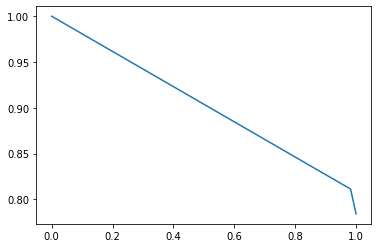

In [ ]:
# Random Forest AUPRC
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rf)
print(f'Random Forest AUPRC score: {auc(recall_rf, precision_rf)}')

plt.plot(recall_rf, precision_rf)
plt.show()

grade
dti
mo_sin_old_rev_tl_op
revol_util
avg_cur_bal


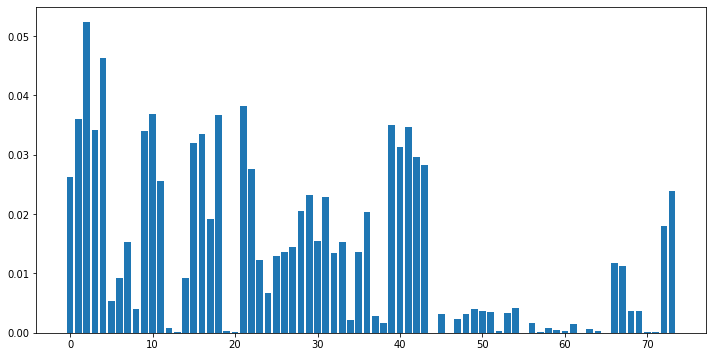

In [ ]:
importance = rf_classifier.feature_importances_

l = list(enumerate(importance))
l = sorted(l, key=lambda x: x[1], reverse=True)[:5]

for i, v in l:
  print(X.columns[i])

# plot feature importance
plt.figure(figsize=(12, 6))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
ann = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(37, 12), random_state=1)
ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)
print(f'ANN Accuracy: {accuracy_score(y_test, y_pred_ann)}')

ANN Accuracy: 0.8070267493085845


In [ ]:
# ANN confusion matrix
print(f'ANN classification report: {classification_report(y_test, y_pred_ann)}')

ANN classification report:               precision    recall  f1-score   support

         0.0       0.67      0.22      0.33     19856
         1.0       0.82      0.97      0.89     71623

    accuracy                           0.81     91479
   macro avg       0.74      0.59      0.61     91479
weighted avg       0.79      0.81      0.77     91479



In [ ]:
# ANN confusion matrix
print(f'ANN confusion matrix: \n{confusion_matrix(y_test, y_pred_ann)}')

ANN confusion matrix: 
[[ 4331 15525]
 [ 2128 69495]]


In [ ]:
# ANN ROC-AUC
print(f'ANN ROC-AUC Score: {roc_auc_score(y_test, y_pred_ann)}')

ANN ROC-AUC Score: 0.5942046705254277


Random Forest AUPRC score: 0.9054734749954664


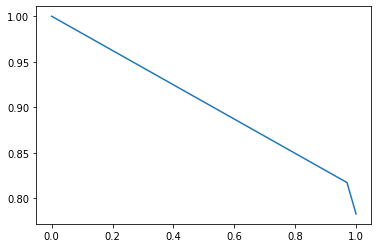

In [ ]:
# ANN AUPRC
precision_ann, recall_ann, thresholds_ann = precision_recall_curve(y_test, y_pred_ann)
print(f'Random Forest AUPRC score: {auc(recall_ann, precision_ann)}')

plt.plot(recall_ann, precision_ann)
plt.show()

In [ ]:
# Ensemble

# Decision Tree Classifier model

decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train,y_train)

# Logistic Regression
log_reg = LogisticRegression(solver='liblinear', random_state=0)
log_reg.fit(X_train, y_train)

models = [('decision_tree', decision_tree), ('random_forest', rf_classifier), ('log_reg', log_reg)]
ensemble = VotingClassifier(models, voting='hard')
ensemble.fit(X_train, y_train)
y_pred_ens = ensemble.predict(X_test)
print(f'Ensemble Accuracy: {accuracy_score(y_test, y_pred_ens)}')

Ensemble Accuracy: 0.8072453787207993


In [ ]:
print(f'Ensemble classification report: {classification_report(y_test, y_pred_ens)}')

Ensemble classification report:               precision    recall  f1-score   support

         0.0       0.72      0.18      0.28     19757
         1.0       0.81      0.98      0.89     71722

    accuracy                           0.81     91479
   macro avg       0.77      0.58      0.59     91479
weighted avg       0.79      0.81      0.76     91479



In [ ]:
print(f'Ensemble confusion matrix: \n{confusion_matrix(y_test, y_pred_ens)}')

Ensemble confusion matrix: 
[[ 3480 16277]
 [ 1356 70366]]


In [ ]:
print(f'Ensemble ROC-AUC Score: {roc_auc_score(y_test, y_pred_ens)}')

Ensemble ROC-AUC Score: 0.5786168847286619


Ensemble AUPRC score: 0.9040269509477724


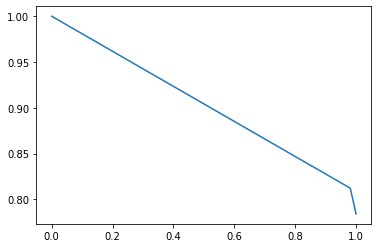

In [ ]:
precision_ens, recall_ens, thresholds_ens = precision_recall_curve(y_test, y_pred_ens)
print(f'Ensemble AUPRC score: {auc(recall_ens, precision_ens)}')

plt.plot(recall_ens, precision_ens)
plt.show()

Ensemble Accuracy: 0.8072453787207993
Ensemble classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.18      0.28     19757
         1.0       0.81      0.98      0.89     71722

    accuracy                           0.81     91479
   macro avg       0.77      0.58      0.59     91479
weighted avg       0.79      0.81      0.76     91479

Ensemble confusion matrix: 
[[ 3480 16277]
 [ 1356 70366]]
Ensemble ROC-AUC Score: 0.5786168847286619
Ensemble AUPRC score: 0.9040269509477724


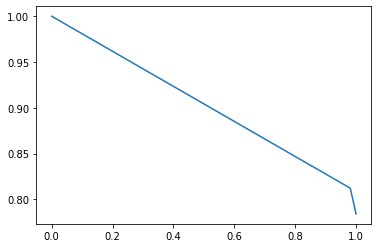

In [ ]:
print(f'Ensemble Accuracy: {accuracy_score(y_test, y_pred_ens)}')
print(f'Ensemble classification report:\n {classification_report(y_test, y_pred_ens)}')
print(f'Ensemble confusion matrix: \n{confusion_matrix(y_test, y_pred_ens)}')
print(f'Ensemble ROC-AUC Score: {roc_auc_score(y_test, y_pred_ens)}')
precision_ens, recall_ens, thresholds_ens = precision_recall_curve(y_test, y_pred_ens)
print(f'Ensemble AUPRC score: {auc(recall_ens, precision_ens)}')

plt.plot(recall_ens, precision_ens)
plt.show()